# Import libraries

In [343]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [344]:
# Read Data
df_hr = pd.read_csv('HR_Employee_Attrition_Data.csv')

In [345]:
pd.set_option('display.max_columns',100)

In [346]:
df_hr.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               3   
3                 3          4  Life Sciences              1               4   
4                 2          1        Medical              1               5   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [347]:
df_hr.shape

(2940, 35)

# Data Cleaning

In [348]:
df_hr.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  2940.000000  2940.000000       2940.000000  2940.000000         2940.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.133819   403.440447          8.105485     1.023991            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     2940.000000              2940.000000  2940.000000     2940.000000   
mean      1470.500000                 2.721769    65.891156        2.729932   
std        848.849221                 1.092896    20.325969        0.711440   
min          1.000000                 1.000000    30.000000        1.000000   
25%        735.750000                 2.000000    48.000000        2.000000   
50%       1470.500000                 3.000000    66.000000        3.000000   
75%       2205.250000                 4.000000    84.000000        3.000000   
max       2940.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  2940.000000      2940.000000    2940.000000   2940.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106752         1.102658    4707.155770   7116.575021   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8045.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8380.000000  20462.000000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         2940.000000        2940.000000        2940.000000   
mean             2.693197          15.209524           3.153741   
std              2.497584           3.659315           0.360762   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               2940.000000         2940.0       2940.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081025            0.0          0.851932   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        2940.000000            2940.000000      2940.000000   
mean           11.279592               2.799320         2.761224   
std             7.779458               1.289051         0.706356   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     2940.000000         2940.000000              2940.

In [349]:
# removing the columns with 0 variance
# EmployeeCount and StandardHours have 0 variance
df_hr.drop(['EmployeeCount', 'StandardHours'], axis=1, inplace=True)

In [350]:
# Removing EmployeeNumber as it is just the employeeID and doesn't add any value
df_hr.drop(['EmployeeNumber'], axis=1, inplace=True)

In [351]:
df_hr.shape

(2940, 32)

In [352]:
# No missing value
df_hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [353]:
# Check for duplicate rows
df_hr[df_hr.duplicated()]

Age Attrition     BusinessTravel  DailyRate              Department  \
1470   41       Yes      Travel_Rarely       1102                   Sales   
1471   49        No  Travel_Frequently        279  Research & Development   
1472   37       Yes      Travel_Rarely       1373  Research & Development   
1473   33        No  Travel_Frequently       1392  Research & Development   
1474   27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
2935   36        No  Travel_Frequently        884  Research & Development   
2936   39        No      Travel_Rarely        613  Research & Development   
2937   27        No      Travel_Rarely        155  Research & Development   
2938   49        No  Travel_Frequently       1023                   Sales   
2939   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
1470                 1          2  Life Sciences                        2   
1471                 8          1  Life Sciences                        3   
1472                 2          2          Other                        4   
1473                 3          4  Life Sciences                        4   
1474                 2          1        Medical                        1   
...                ...        ...            ...                      ...   
2935                23          2        Medical                        3   
2936                 6          1        Medical                        4   
2937                 4          3  Life Sciences                        2   
2938                 2          3        Medical                        4   
2939                 8          3        Medical                        2   

      Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  \
1470  Female          94               3         2            Sales Executive   
1471    Male          61               2         2         Research Scientist   
1472    Male          92               2         1      Laboratory Technician   
1473  Female          56               3         1         Research Scientist   
1474    Male          40               3         1      Laboratory Technician   
...      ...         ...             ...       ...                        ...   
2935    Male          41               4         2      Laboratory Technician   
2936    Male          42               2         3  Healthcare Representative   
2937    Male          87               4         2     Manufacturing Director   
2938    Male          63               2         2            Sales Executive   
2939    Male          82               4         2      Laboratory Technician   

      JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
1470                4        Single           5993        19479   
1471                2       Married           5130        24907   
1472                3        Single           2090         2396   
1473                3       Married           2909        23159   
1474                2       Married           3468        16632   
...               ...           ...            ...          ...   
2935                4       Married           2571        12290   
2936                1       Married           9991        21457   
2937                2       Married           6142         5174   
2938                2       Married           5390        13243   
2939                3       Married           4404        10228   

      NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
1470                   8      Y      Yes                 11   
1471                   1      Y       No                 23   
1472                   6      Y      Yes                 15   
1473                   1      Y      Yes                 11   
1474                   9      Y       No                 12   


In [354]:
# Drop duplicated rows
df_hr.drop_duplicates(inplace=True)

In [355]:
df_hr.shape

(1470, 32)

In [356]:
df_hr.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
StockOptionLevel                         0.003432    0.050263        0.021523   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   

                          JobLevel  JobSatisfaction  MonthlyIncome  \
Age                       0.509604        -0.004892       0.497855   
DailyRate                 0.002966         0.030571       0.007707   
Dis

In [357]:
# Checking correlation
corrmat = df_hr.corr().abs()
upper_tri = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
upper_tri
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
to_drop

['MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

In [358]:
# Drop highly correlated columns
df_hr.drop(to_drop, axis=1, inplace=True)

In [359]:
df_hr.shape

(1470, 27)

In [360]:
df_hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
dtype: object

In [361]:
# Define the Dependent variable
df_hr['target'] = np.where(df_hr['Attrition'].isin(['Yes']),1,0)

In [362]:
# Drop the Attrition column as we have already created target column
df_hr.drop(['Attrition'], axis=1, inplace=True)

In [363]:
# Calculate the mean of target column
df_hr['target'].mean()

0.16122448979591836

In [364]:
# Get summary stats of categorical columns
df_hr.describe(include=['O'])

BusinessTravel              Department EducationField Gender  \
count            1470                    1470           1470   1470   
unique              3                       3              6      2   
top     Travel_Rarely  Research & Development  Life Sciences   Male   
freq             1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054

In [365]:
# As Over18 also has 1 value, so dropping that column
df_hr.drop(['Over18'], axis=1, inplace=True)

In [366]:
df_hr.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
count      1470.000000   1470.000000         1470.000000        1470.000000   
mean          2.728571  14313.103401            2.693197          15.209524   
std           1.102846   7117.786044            2.498009           3.659938   
min           1.000000   2094.000000            0.000000          11.000000   
25%           2.000000   8047.000000            1.000000          12.000000   
50%           3.000000  14235.500000            2.000000          14.000000   
75%           4.000000  20461.500000            4.000000          18.000000   
max           4.000000  26999.000000            9.000000          25.000000   

       RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
count               1470.000000       1470.000000            1470.000000   
mean                   2.712245          0.793878               2.799320   
std                    1.081209          0.852077               1.289271   
min                    1.000000          0.000000               0.000000   
25%                    2.000000          0.000000               2.000000   
50%                    3.000000          1.000000               3.000000   
75%                    4.000000          1.000000               3.000000   
max                    4.000000          3.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsSinceLastPromotion       target  
count      1470.000000     1470.000000              1470.000000  1470.000000  
mean          2.761224        7.008163                 2.187755     0.161224  
std           0.706476        6.126525                 3.222430     0.367863  
min           1.000000        0.000000                 0.000000     0.000000  
25%           2.000000        3.000000                 0.000000     0.000000  
50%           3.000000        5.000000                 1.000000     0.000000  
75%           3.000000        9.000000                 3.000000     0.000000  
max           4.000000       40.000000                15.000000     1.000000

In [367]:
df_hr.head()

Age     BusinessTravel  DailyRate              Department  \
0   41      Travel_Rarely       1102                   Sales   
1   49  Travel_Frequently        279  Research & Development   
2   37      Travel_Rarely       1373  Research & Development   
3   33  Travel_Frequently       1392  Research & Development   
4   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyRate  NumCompaniesWorked OverTime  \
0                4        Single        19479                   8      Yes   
1                2       Married        24907                   1       No   
2                3        Single         2396                   6      Yes   
3                3       Married        23159                   1      Yes   
4                2       Married        16632                   9       No   

   PercentSalaryHike  RelationshipSatisfaction  StockOptionLevel  \
0                 11                         1                 0   
1                 23                         4                 1   
2                 15                         2                 0   
3                 11                         3                 0   
4                 12                         4                 1   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                      0                1               6   
1                      3                3              10   
2                      3                3               0   
3                      3                3               8   
4                      3                3               2   

   YearsSinceLastPromotion  target  
0                        0       1  
1                        1       0  
2                        0       1  
3                        3       0  
4                        2       0

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Age'>

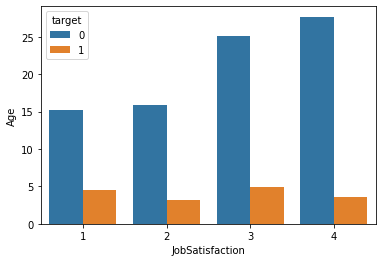

In [368]:
sns.barplot(x='JobSatisfaction', y='Age', hue="target", data=df_hr, estimator=lambda x: len(x) / len(df_hr) * 100)

<AxesSubplot:xlabel='BusinessTravel', ylabel='JobSatisfaction'>

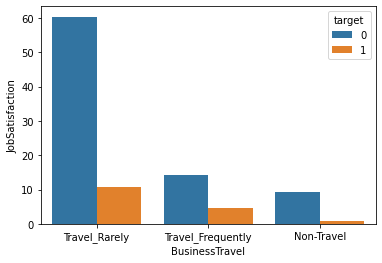

In [369]:
sns.barplot(x='BusinessTravel', y='JobSatisfaction', hue="target", data=df_hr, estimator=lambda x: len(x) / len(df_hr) * 100)

In [370]:
# We can see that Job Satisfaction is higher in higher ages and attrition rate is also less

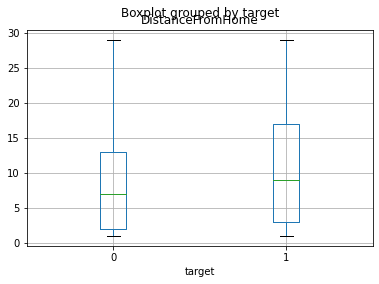

In [371]:
df_hr.boxplot(column=['DistanceFromHome'], return_type='axes', by='target')
plt.show()

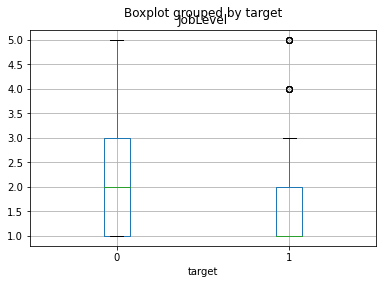

In [372]:
df_hr.boxplot(column=['JobLevel'], return_type='axes', by='target')
plt.show()

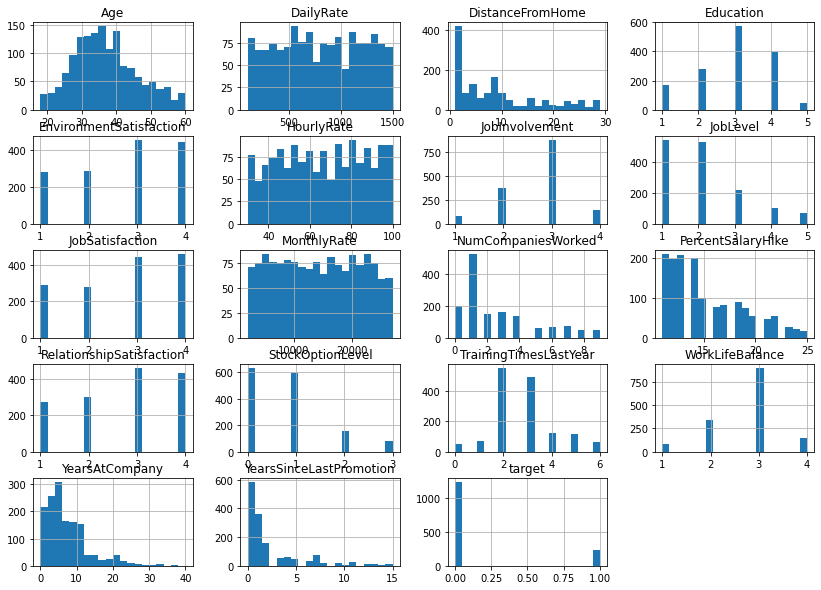

In [373]:
df_hr.hist(bins=20, figsize=(14,10))
plt.show()

In [374]:
char=df_hr.select_dtypes(include='object')
num=df_hr.select_dtypes(include='number')

In [375]:
char.shape

(1470, 7)

In [376]:
num.shape

(1470, 19)

In [377]:
# We can do some further EDA for a pool of features as well
att_yes = round(df_hr[df_hr['target'] == 1][list(num.columns)].describe(),2)
att_no = round(df_hr[df_hr['target'] == 0][list(num.columns)].describe(),2)
pd.concat([att_yes, att_no], axis=0, keys=['Attritor', 'Non Attritor'])

Age  DailyRate  DistanceFromHome  Education  \
Attritor     count   237.00     237.00            237.00     237.00   
             mean     33.61     750.36             10.63       2.84   
             std       9.69     401.90              8.45       1.01   
             min      18.00     103.00              1.00       1.00   
             25%      28.00     408.00              3.00       2.00   
             50%      32.00     699.00              9.00       3.00   
             75%      39.00    1092.00             17.00       4.00   
             max      58.00    1496.00             29.00       5.00   
Non Attritor count  1233.00    1233.00           1233.00    1233.00   
             mean     37.56     812.50              8.92       2.93   
             std       8.89     403.21              8.01       1.03   
             min      18.00     102.00              1.00       1.00   
             25%      31.00     477.00              2.00       2.00   
             50%      36.00     817.00              7.00       3.00   
             75%      43.00    1176.00             13.00       4.00   
             max      60.00    1499.00             29.00       5.00   

                    EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Attritor     count                   237.00      237.00          237.00   
             mean                      2.46       65.57            2.52   
             std                       1.17       20.10            0.77   
             min                       1.00       31.00            1.00   
             25%                       1.00       50.00            2.00   
             50%                       3.00       66.00            3.00   
             75%                       4.00       84.00            3.00   
             max                       4.00      100.00            4.00   
Non Attritor count                  1233.00     1233.00         1233.00   
             mean                      2.77       65.95            2.77   
             std                       1.07       20.38            0.69   
             min                       1.00       30.00            1.00   
             25%                       2.00       48.00            2.00   
             50%                       3.00       66.00            3.00   
             75%                       4.00       83.00            3.00   
             max                       4.00      100.00            4.00   

                    JobLevel  JobSatisfaction  MonthlyRate  \
Attritor     count    237.00           237.00       237.00   
             mean       1.64             2.47     14559.31   
             std        0.94             1.12      7208.15   
             min        1.00             1.00      2326.00   
             25%        1.00             1.00      8870.00   
             50%        1.00             3.00     14618.00   
             75%        2.00             3.00     21081.00   
             max        5.00             4.00     26999.00   
Non Attritor count   1233.00          1233.00      1233.00   
             mean       2.15             2.78     14265.78   
             std        1.12             1.09      7102.26   
             min        1.00             1.00      2094.00   
             25%        1.00             2.00      7973.00   
             50%        2.00             3.00     14120.00   
             75%        3.00             4.00     20364.00   
             max        5.00             4.00     26997.00   

                    NumCompaniesWorked  PercentSalaryHike  \
Attritor     count              237.00             237.00   
             mean                 2.94              15.10   
             std                  2.68               3.77   
             min                  0.00              11.00   
             25%                  1.00              12.00   
             50%                  1.00              14.00   
             75%                  5.00              17.00 

In [381]:
# Inferential Stats
from scipy import stats
 
F, p = stats.f_oneway(df_hr[df_hr['target'] == 1]['DistanceFromHome'], 
                      df_hr[df_hr['target'] == 0]['DistanceFromHome'])
print('ANOVA test for mean DistanceFromHome levels across attrition status')
print('F Statistic:', F, ' p-value:', p)


F, p = stats.f_oneway(df_hr[df_hr['target'] == 1]['YearsSinceLastPromotion'],
                      df_hr[df_hr['target'] == 0]['YearsSinceLastPromotion'])
print('ANOVA test for mean YearsSinceLastPromotion levels across attrition status')
print('F Statistic:', F, ' p-value:', p)

F, p = stats.f_oneway(df_hr[df_hr['target'] == 1]['YearsSinceLastPromotion'],
                      df_hr[df_hr['target'] == 0]['YearsSinceLastPromotion'])
print('ANOVA test for mean YearsSinceLastPromotion levels across attrition status')
print('F Statistic:', F, ' p-value:', p)

F, p = stats.f_oneway(df_hr[df_hr['target'] == 1]['JobSatisfaction'],
                      df_hr[df_hr['target'] == 0]['JobSatisfaction'])
print('ANOVA test for mean JobSatisfaction levels across attrition status')
print('F Statistic:', F, ' p-value:', p)

F, p = stats.f_oneway(df_hr[df_hr['target'] == 1]['JobLevel'],
                      df_hr[df_hr['target'] == 0]['JobLevel'])
print('ANOVA test for mean JobLevel levels across attrition status')
print('F Statistic:', F, ' p-value:', p)

F, p = stats.f_oneway(df_hr[df_hr['target'] == 1]['NumCompaniesWorked'],
                      df_hr[df_hr['target'] == 0]['NumCompaniesWorked'])
print('ANOVA test for mean NumCompaniesWorked levels across attrition status')
print('F Statistic:', F, ' p-value:', p)

ANOVA test for mean DistanceFromHome levels across attrition status
F Statistic: 8.968276593814723  p-value: 0.0027930600802132115
ANOVA test for mean YearsSinceLastPromotion levels across attrition status
F Statistic: 1.6022184053056754  p-value: 0.2057899591624541
ANOVA test for mean YearsSinceLastPromotion levels across attrition status
F Statistic: 1.6022184053056754  p-value: 0.2057899591624541
ANOVA test for mean JobSatisfaction levels across attrition status
F Statistic: 15.890003806510506  p-value: 7.043066741730351e-05
ANOVA test for mean JobLevel levels across attrition status
F Statistic: 43.215343827677955  p-value: 6.795384780014228e-11
ANOVA test for mean NumCompaniesWorked levels across attrition status
F Statistic: 2.78228670165566  p-value: 0.09552526205649159


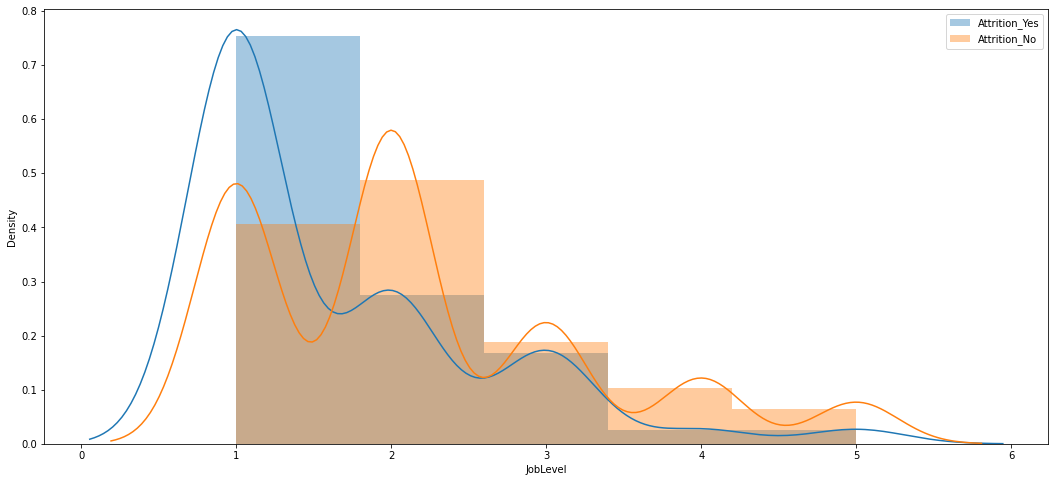

In [382]:
#Let's Visualize
ax = plt.subplots(figsize=(18,8)) # make our plot larger
# plot the cold cereal sugar distribution
sns.distplot(df_hr[df_hr['target'] == 1]['JobLevel'], bins = 5, hist = True,  label = 'Attrition_Yes')
# plot the hot cereal sugar distribution
sns.distplot(df_hr[df_hr['target'] == 0]['JobLevel'], bins = 5, hist = True, label = 'Attrition_No') 
plt.legend() #show legend

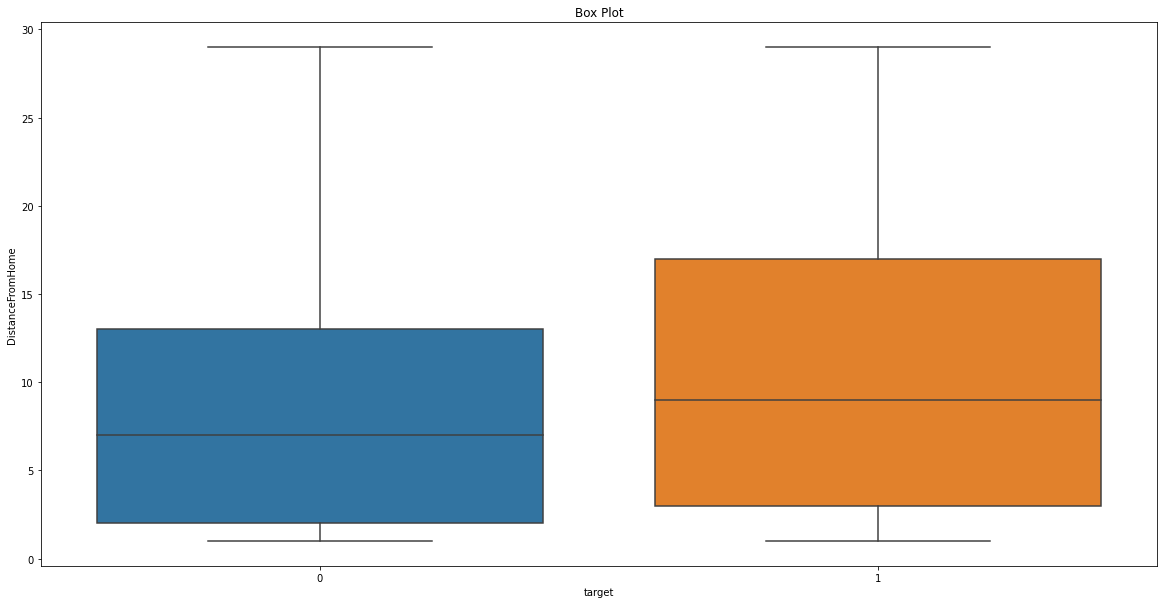

In [383]:
plt.figure(figsize=(20, 10))
plt.title("Box Plot")
sns.boxplot(x='target', y='DistanceFromHome', data=df_hr)
plt.show()

In [384]:
df_hr.head()

Age     BusinessTravel  DailyRate              Department  \
0   41      Travel_Rarely       1102                   Sales   
1   49  Travel_Frequently        279  Research & Development   
2   37      Travel_Rarely       1373  Research & Development   
3   33  Travel_Frequently       1392  Research & Development   
4   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0  Female          94               3         2        Sales Executive   
1    Male          61               2         2     Research Scientist   
2    Male          92               2         1  Laboratory Technician   
3  Female          56               3         1     Research Scientist   
4    Male          40               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus  MonthlyRate  NumCompaniesWorked OverTime  \
0                4        Single        19479                   8      Yes   
1                2       Married        24907                   1       No   
2                3        Single         2396                   6      Yes   
3                3       Married        23159                   1      Yes   
4                2       Married        16632                   9       No   

   PercentSalaryHike  RelationshipSatisfaction  StockOptionLevel  \
0                 11                         1                 0   
1                 23                         4                 1   
2                 15                         2                 0   
3                 11                         3                 0   
4                 12                         4                 1   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                      0                1               6   
1                      3                3              10   
2                      3                3               0   
3                      3                3               8   
4                      3                3               2   

   YearsSinceLastPromotion  target  
0                        0       1  
1                        1       0  
2                        0       1  
3                        3       0  
4                        2       0

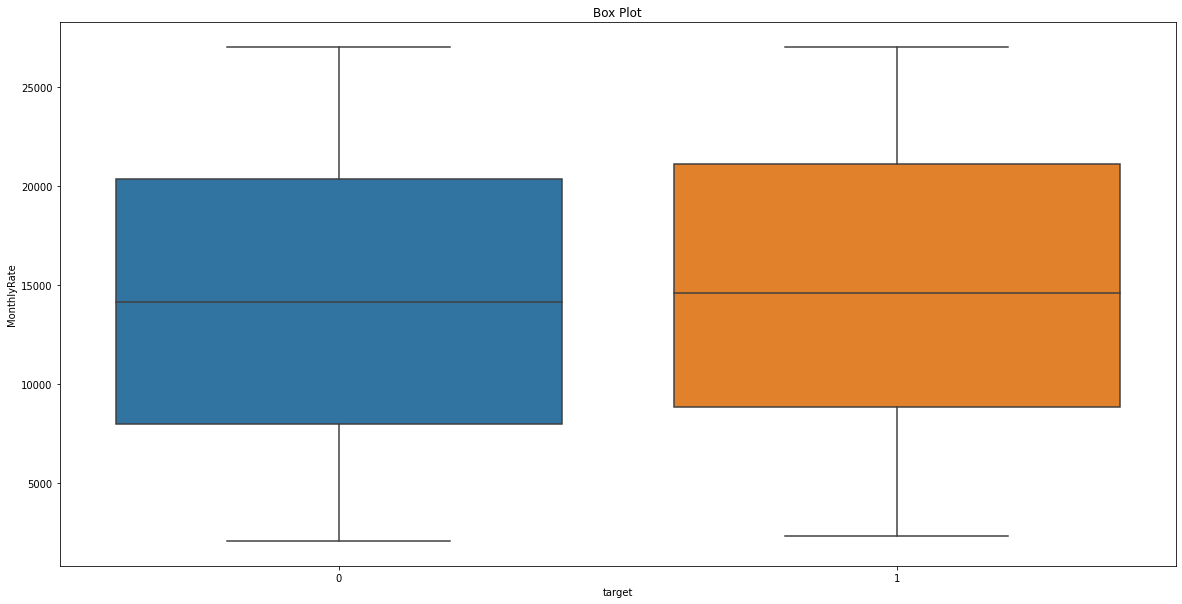

In [385]:
plt.figure(figsize=(20, 10))
plt.title("Box Plot")
sns.boxplot(x='target', y='MonthlyRate', data=df_hr)
plt.show()

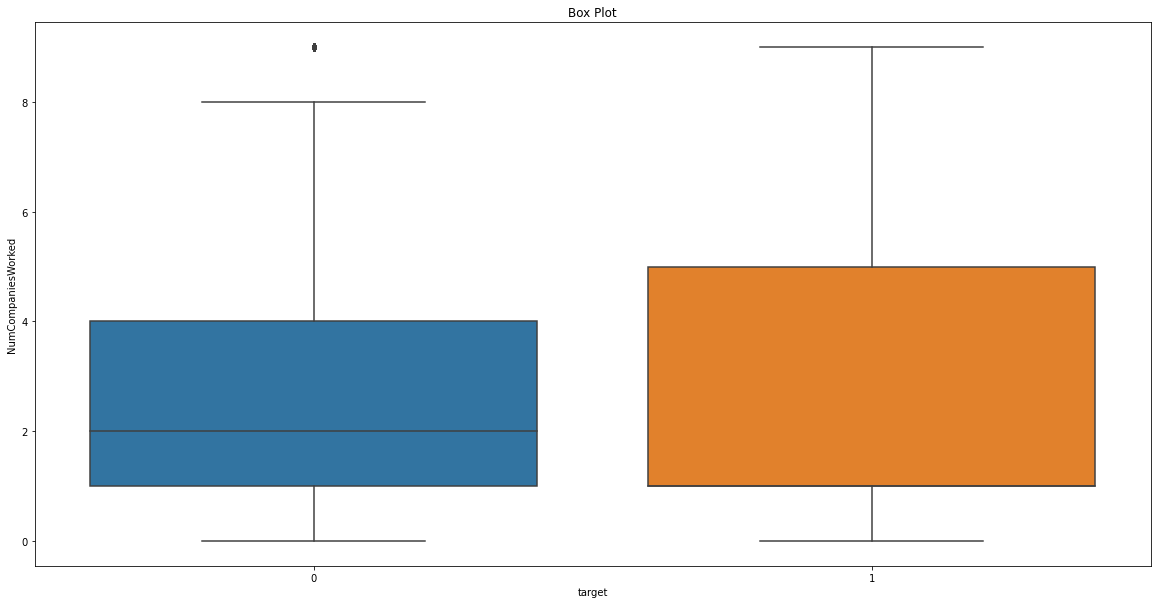

In [386]:
plt.figure(figsize=(20, 10))
plt.title("Box Plot")
sns.boxplot(x='target', y='NumCompaniesWorked', data=df_hr)
plt.show()

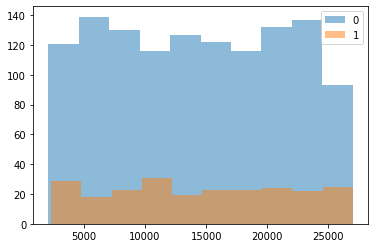

In [387]:
x = df_hr[df_hr['target']==1]
y = df_hr[df_hr['target']==0]
plt.hist(y['MonthlyRate'], alpha=0.5,label='0')
plt.hist(x['MonthlyRate'], alpha=0.5,label='1')
plt.legend(loc='upper right')
plt.show()

# Data Preprocessing

In [389]:
from sklearn.preprocessing import LabelEncoder

cat_features = df_hr.columns[df_hr.dtypes == object]
# Label Encoding
for f in cat_features:
    lbl = LabelEncoder()
    lbl.fit(list(df_hr[f].values))
    df_hr[f] = lbl.transform(list(df_hr[f].values))

In [390]:
df_hr.head()

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0   41               2       1102           2                 1          2   
1   49               1        279           1                 8          1   
2   37               2       1373           1                 2          2   
3   33               1       1392           1                 3          4   
4   27               2        591           1                 2          1   

   EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0               1                        2       0          94   
1               1                        3       1          61   
2               4                        4       1          92   
3               1                        4       0          56   
4               3                        1       1          40   

   JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0               3         2        7                4              2   
1               2         2        6                2              1   
2               2         1        2                3              2   
3               3         1        6                3              1   
4               3         1        2                2              1   

   MonthlyRate  NumCompaniesWorked  OverTime  PercentSalaryHike  \
0        19479                   8         1                 11   
1        24907                   1         0                 23   
2         2396                   6         1                 15   
3        23159                   1         1                 11   
4        16632                   9         0                 12   

   RelationshipSatisfaction  StockOptionLevel  TrainingTimesLastYear  \
0                         1                 0                      0   
1                         4                 1                      3   
2                         2                 0                      3   
3                         3                 0                      3   
4                         4                 1                      3   

   WorkLifeBalance  YearsAtCompany  YearsSinceLastPromotion  target  
0                1               6                        0       1  
1                3              10                        1       0  
2                3               0                        0       1  
3                3               8                        3       0  
4                3               2                        2       0

In [391]:
X = df_hr.drop(['target'],axis =1)
Y = df_hr['target']

In [392]:
x_train, x_test, y_train, y_test = train_test_split(X ,Y, test_size =0.2)

In [393]:
print(x_train.shape)
print(x_test.shape)

(1176, 25)
(294, 25)


# Build the Decision Tree Model

In [394]:
# Declaring a Function to Detect Model’s Accuracy 
def model_perf(model_name, x_train, y_train, y_test, y_pred):
    print ('Model name: %s'%model_name)
    print ('Test accuracy (Accuracy Score): %f'%metrics.accuracy_score(y_test, y_pred))
    print ('Test accuracy (ROC AUC Score): %f'%metrics.roc_auc_score(y_test, y_pred))
    fpr, tpr, thresholds = metrics.precision_recall_curve(y_test, y_pred)
    print ('Area Under the Precision-Recall Curve: %f'%metrics.auc(fpr, tpr))
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [395]:
# Building a model with default parameters for DecisionTreeClassifier()
clf_dt = DecisionTreeClassifier(random_state=42, max_depth=4)
clf_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [396]:
clf_dt_train = clf_dt.score(x_train, y_train)
print("Training score: ",clf_dt_train)
clf_dt_test = clf_dt.score(x_test, y_test)
print("Testing score: ",clf_dt_test)

Training score:  0.8758503401360545
Testing score:  0.8571428571428571


Model name: Decision tree classifier
Test accuracy (Accuracy Score): 0.857143
Test accuracy (ROC AUC Score): 0.570136
Area Under the Precision-Recall Curve: 0.217395


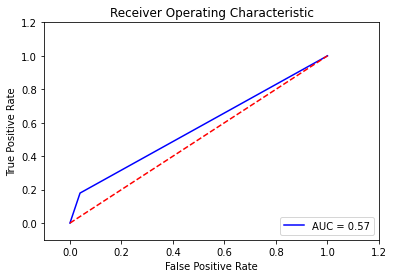

In [397]:
# Finding Accuracy of Decision Tree Classifier
y_pred = clf_dt.predict(x_test)
model_perf('Decision tree classifier', x_train, y_train, y_test,y_pred)

# Hyperparameter Tuning using GridSearchCV

In [398]:
from sklearn.model_selection import GridSearchCV

model_dt_gs = DecisionTreeClassifier(random_state=42)

param_dist = {'criterion': ['entropy', 'gini'], 
              'max_depth': [5,10,20,50,100],
              'min_samples_leaf': [1,2,3],
              'min_samples_split': [2,3,4]}

cv_rf = GridSearchCV(model_dt_gs, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [399]:
# Training the Model by Applying Decision Tree Classifier
clf_dt_best = DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2,
                                     min_samples_leaf=1, random_state=42)
clf_dt_best.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Model name: Decision tree classifier
Test accuracy (Accuracy Score): 0.829932
Test accuracy (ROC AUC Score): 0.554449
Area Under the Precision-Recall Curve: 0.151512


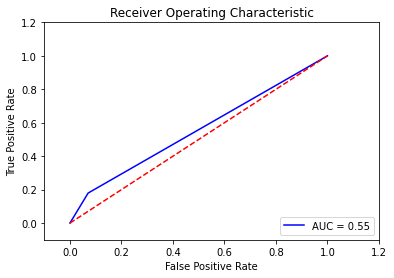

In [400]:
# Finding Accuracy of Decision Tree Classifier
y_pred = clf_dt_best.predict(x_test)
model_perf('Decision tree classifier', x_train, y_train, y_test,y_pred)

# Model Performance Measures

In [401]:
def get_metrics(true_labels, predicted_labels):
    print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels),2))
    print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels,average='weighted'),2))
    print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels,average='weighted'),2))
    print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels,average='weighted'),2))

def train_predict_model(classifier,train_features,train_labels,test_features,test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions

def confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]
    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, labels=classes)
#     mat_frame = pd.DataFrame(data=cm, columns=pd.MultiIndex(levels=[['Predicted:'], classes], labels=level_labels), index=pd.MultiIndex(levels=[['Actual:'], classes], labels=level_labels)) 
    print(cm)

def classification_report(true_labels, predicted_labels, classes=[1,0]):
    report = metrics.classification_report(y_true=true_labels,y_pred=predicted_labels, labels=classes) 
    print(report)

def model_performance_metrics(true_labels,predicted_labels,classes=[1,0]):
    print('Model Performance metrics:')
    print('*'*70)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('Model Classification report:')
    print('*'*70)
    classification_report(true_labels=true_labels, predicted_labels=predicted_labels, classes=classes)
    print('Prediction Confusion Matrix:')
    print('*'*70)
    confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels,classes=classes)

In [402]:
model_performance_metrics(true_labels=y_test, predicted_labels=y_pred, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.83
Precision: 0.8
Recall: 0.83
F1 Score: 0.81
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.28      0.18      0.22        39
           0       0.88      0.93      0.90       255

    accuracy                           0.83       294
   macro avg       0.58      0.55      0.56       294
weighted avg       0.80      0.83      0.81       294

Prediction Confusion Matrix:
**********************************************************************
[[  7  32]
 [ 18 237]]


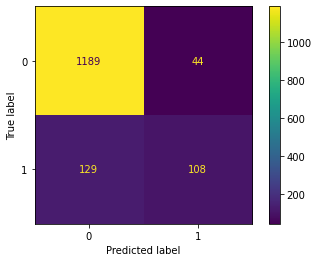

In [403]:
metrics.plot_confusion_matrix(clf_dt_best, X, Y)

# Getting the feature importance from the DT model

In [404]:
 # Plot of Variable importance by mean decrease in gini - Choosing the top 10 features
def plot_feature_importance(classifier):
    feature_ranks = pd.Series(classifier.feature_importances_,index=x_train.columns, name='Importance').sort_values(ascending=False, inplace=False)
    feature_ranks.index.name = 'Features'
    top_features = feature_ranks.iloc[:10].sort_values(ascending=True,inplace=False)
    plt.figure(figsize=(10,10))
    ax = top_features.plot(kind='barh')
    _ = ax.set_title("Variable Importance Plot")
    _ = ax.set_xlabel('Mean decrease in Gini')
    _ = ax.set_yticklabels(top_features.index, fontsize=10)

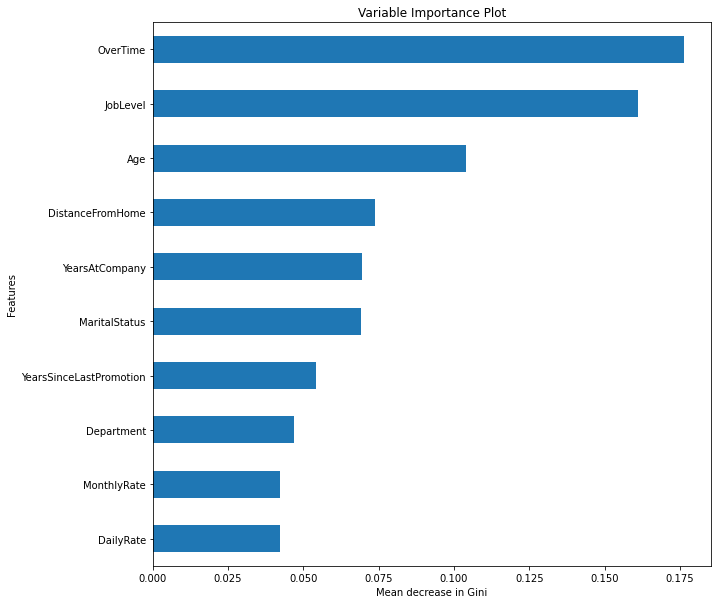

In [405]:
plot_feature_importance(clf_dt_best)

# Random Forst Classifier

In [407]:
# Building a model with default parameters for DecisionTreeClassifier()
fit_rf = RandomForestClassifier(random_state=42)

# Hyperparameter Tuning using GridSearchCV

In [408]:
np.random.seed(42)

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'max_features': None}


In [409]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'gini',
                  bootstrap = True,
                  max_depth = 3)

RandomForestClassifier(max_depth=3, random_state=42)

# OOB Rate

In [410]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(x_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [411]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

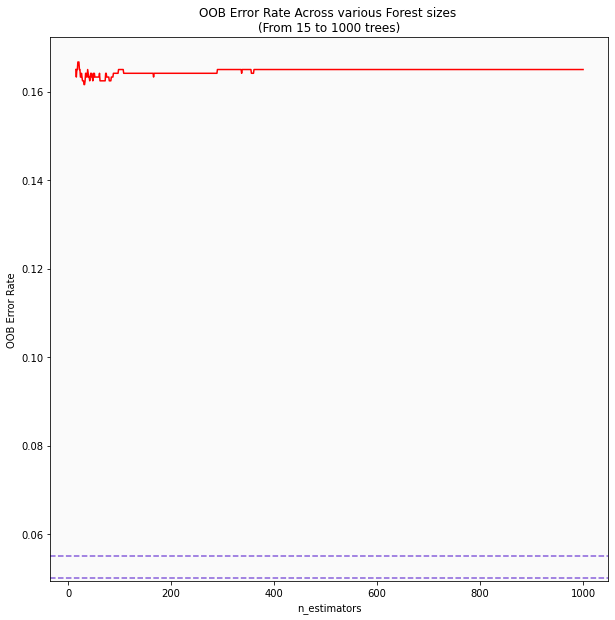

In [412]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [413]:
print('OOB Error rate for 300 trees is: {0:.5f}'.format(oob_series[300]))

OOB Error rate for 300 trees is: 0.16497


In [414]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=300,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(max_depth=3, n_estimators=300, random_state=42)

In [418]:
fit_rf_train = fit_rf.score(x_train, y_train)
print("Training score: ",fit_rf_train)
fit_rf_test = fit_rf.score(x_test, y_test)
print("Testing score: ",clf_dt_test)

Training score:  0.8401360544217688
Testing score:  0.8571428571428571


In [415]:
fit_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=300, random_state=42)

Model name: Random Forst classifier
Test accuracy (Accuracy Score): 0.870748
Test accuracy (ROC AUC Score): 0.512821
Area Under the Precision-Recall Curve: 0.444793


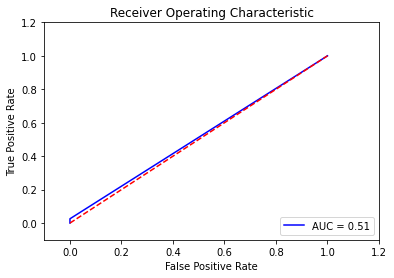

In [416]:
# Finding Accuracy of Decision Tree Classifier
y_pred = fit_rf.predict(x_test)
model_perf('Random Forst classifier', x_train, y_train, y_test, y_pred)

In [ ]:
# Performance Metrics for Random Forest

In [417]:
model_performance_metrics(true_labels=y_test, predicted_labels=y_pred, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.87
Precision: 0.89
Recall: 0.87
F1 Score: 0.81
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       1.00      0.03      0.05        39
           0       0.87      1.00      0.93       255

    accuracy                           0.87       294
   macro avg       0.94      0.51      0.49       294
weighted avg       0.89      0.87      0.81       294

Prediction Confusion Matrix:
**********************************************************************
[[  1  38]
 [  0 255]]
